In [ ]:
import requests
import pandas as pd
from IPython.display import JSON

# Foursquare

Send a request to Foursquare with a small radius (1000m) for all the bike stations in your city of choice.

In [ ]:
foursquare_api_key =


headers = {
    "Accept": "application/json",
    "Authorization": foursquare_api_key
}


params = {
    "categories": "19002",  # Bike Rental Station category
    "ll": "49.2827,-123.1207",  # Coordinates for Vancouver, BC
    "radius": 1000,  # 1000 meters search radius
    "limit": 50  # Max number of results
}


foursquare_url = "https://api.foursquare.com/v3/places/search"


response = requests.get(foursquare_url, headers=headers, params=params)


bike_stations = []
if response.status_code == 200:
    data = response.json()
    for place in data.get("results", []):
        name = place.get("name", "Unknown")
        lat = place["geocodes"]["main"]["latitude"]
        lon = place["geocodes"]["main"]["longitude"]
        bike_stations.append((name, lat, lon))
else:
    print("Error:", response.json())


for station in bike_stations:
    print(f"Bike Station: {station[0]}, Latitude: {station[1]}, Longitude: {station[2]}")


Bike Station: Seawall Adventure Centre, Latitude: 49.289686, Longitude: -123.118377
Bike Station: Mobi 0027 Bike Station, Latitude: 49.275994, Longitude: -123.116803
Bike Station: EzeeRiders, Latitude: 49.28967, Longitude: -123.115861
Bike Station: Bee's Knees eBike Tours and Rentals, Latitude: 49.277977, Longitude: -123.131249
Bike Station: Yes Cycle Bike Rentals & Sup Paddle Board Rentals, Latitude: 49.277787, Longitude: -123.132044


Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [ ]:

poi_params = {
    "categories": "13065,13003",  # 13065 = Restaurant, 13003 = Bar
    "radius": 1000,  # 1000 meters around bike stations
    "limit": 50  # Max results per station
}

poi_results = []


for station in bike_stations:
    lat, lon = station[1], station[2]
    poi_params["ll"] = f"{lat},{lon}"  # Latitude, Longitude

    poi_response = requests.get(foursquare_url, headers=headers, params=poi_params)

    if poi_response.status_code == 200:
        poi_data = poi_response.json()
        for place in poi_data.get("results", []):
            poi_results.append({
                "Bike Station": station[0],
                "POI Name": place.get("name", "Unknown"),
                "Category": place["categories"][0]["name"] if place.get("categories") else "Unknown",
                "Latitude": place["geocodes"]["main"]["latitude"],
                "Longitude": place["geocodes"]["main"]["longitude"]
            })
    else:
        print(f"Error fetching POIs near {station[0]}:", poi_response.json())


for poi in poi_results[:50]:
    print(f"Near {poi['Bike Station']}: {poi['POI Name']} ({poi['Category']}) at {poi['Latitude']}, {poi['Longitude']}")


Near Seawall Adventure Centre: Cactus Club Cafe (American Restaurant) at 49.289603, -123.118045
Near Seawall Adventure Centre: Tap & Barrel (Bar) at 49.289881, -123.116933
Near Seawall Adventure Centre: Koffie (Café) at 49.287035, -123.11953
Near Seawall Adventure Centre: Fairmont Waterfront (Restaurant) at 49.287101, -123.113775
Near Seawall Adventure Centre: The Vancouver Club (Structure) at 49.286952, -123.115629
Near Seawall Adventure Centre: Miku (Sushi Restaurant) at 49.286766, -123.112205
Near Seawall Adventure Centre: Cactus Club Cafe Bentall 5 (American Restaurant) at 49.285532, -123.118834
Near Seawall Adventure Centre: Joe Fortes Seafood & Chop House (Seafood Restaurant) at 49.284956, -123.124545
Near Seawall Adventure Centre: Thierry (Dessert Shop) at 49.284766, -123.122662
Near Seawall Adventure Centre: Gotham Steakhouse & Cocktail Bar (Steakhouse) at 49.282814, -123.115925
Near Seawall Adventure Centre: The Keg Steakhouse + Bar (Restaurant) at 49.283447, -123.116466
Near 

Put your parsed results into a DataFrame

In [ ]:
import pandas as pd


df = pd.DataFrame(poi_results)


df.to_csv("bike_station_pois.csv", index=False)

print("File saved as 'bike_station_pois.csv'")


File saved as 'bike_station_pois.csv'


In [ ]:
bike_station_pois = pd.read_csv("bike_station_pois.csv")
bike_station_pois

,Bike Station,POI Name,Category,Latitude,Longitude
0,Seawall Adventure Centre,Cactus Club Cafe,American Restaurant,49.289603,-123.118045
1,Seawall Adventure Centre,Tap & Barrel,Bar,49.289881,-123.116933
2,Seawall Adventure Centre,Koffie,Café,49.287035,-123.119530
3,Seawall Adventure Centre,Fairmont Waterfront,Restaurant,49.287101,-123.113775
4,Seawall Adventure Centre,The Vancouver Club,Structure,49.286952,-123.115629
...,...,...,...,...,...
245,Yes Cycle Bike Rentals & Sup Paddle Board Rentals,Chipotle Mexican Grill,Fast Food Restaurant,49.281585,-123.121012
246,Yes Cycle Bike Rentals & Sup Paddle Board Rentals,Tim Hortons,"Cafe, Coffee, and Tea House",49.277591,-123.127241
247,Yes Cycle Bike Rentals & Sup Paddle Board Rentals,Tartine Bread & Pies,Bakery,49.274482,-123.131680
248,Yes Cycle Bike Rentals & Sup Paddle Board Rentals,The Famous Warehouse,Gastropub,49.279552,-123.122866


In [ ]:
pd.json_normalize(data['results'])

,fsq_id,categories,chains,closed_bucket,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,...,location.address,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,geocodes.drop_off.latitude,geocodes.drop_off.longitude,location.address_extended
0,5d3764f2c2424b000811e539,"[{'id': 19002, 'name': 'Bike Rental', 'short_n...",[],LikelyOpen,794,/v3/places/5d3764f2c2424b000811e539,Seawall Adventure Centre,America/Vancouver,49.289686,-123.118377,...,1075 W Waterfront Rd,CA,,"1075 W Waterfront Rd, Vancouver BC V6C 0A1",Vancouver,V6C 0A1,BC,NaN,NaN,NaN
1,57901226498e5050f79cd6f8,"[{'id': 19002, 'name': 'Bike Rental', 'short_n...",[],LikelyOpen,796,/v3/places/57901226498e5050f79cd6f8,Mobi 0027 Bike Station,America/Vancouver,49.275994,-123.116803,...,Beatty St,CA,Nelson Street,"Beatty St (Nelson Street), Vancouver BC",Vancouver,NaN,BC,49.275812,-123.116674,NaN
2,5195167b498ea0d0f7c32fdc,"[{'id': 19002, 'name': 'Bike Rental', 'short_n...",[],Unsure,850,/v3/places/5195167b498ea0d0f7c32fdc,EzeeRiders,America/Vancouver,49.289670,-123.115861,...,1055 Canada Pl,CA,,"1055 Canada Pl, Vancouver BC V6C 0C3",Vancouver,V6C 0C3,BC,NaN,NaN,Unit 28
3,5f0f9d9d970f1e3308791724,"[{'id': 19002, 'name': 'Bike Rental', 'short_n...",[],LikelyOpen,927,/v3/places/5f0f9d9d970f1e3308791724,Bee's Knees eBike Tours and Rentals,America/Vancouver,49.277977,-123.131249,...,1315 Burrard St,CA,,"1315 Burrard St, Vancouver BC V6Z 1Z7",Vancouver,V6Z 1Z7,BC,49.277799,-123.131131,NaN
4,5b4570facf72a0002c877f16,"[{'id': 19002, 'name': 'Bike Rental', 'short_n...",[],LikelyOpen,987,/v3/places/5b4570facf72a0002c877f16,Yes Cycle Bike Rentals & Sup Paddle Board Rentals,America/Vancouver,49.277787,-123.132044,...,1351 Burrard St,CA,,"1351 Burrard St, Vancouver BC V6Z 1Z7",Vancouver,V6Z 1Z7,BC,NaN,NaN,NaN


# Yelp

Send a request to Yelp with a small radius (1000m) for all the bike stations in your city of choice.

In [ ]:
import requests
from IPython.display import JSON



foursquare_api_key =


headers = {
    "Accept": "application/json",
    "Authorization": foursquare_api_key
}


params = {
    "categories": "19002",  # Category for Bike Rental Stations
    "ll": "49.2827,-123.1207",  # Vancouver, BC (Downtown)
    "radius": 5000,  # Larger radius to capture more stations
    "limit": 50  # Get up to 50 results
}


foursquare_url = "https://api.foursquare.com/v3/places/search"


response = requests.get(foursquare_url, headers=headers, params=params)


bike_stations = []
if response.status_code == 200:
    data = response.json()
    for place in data.get("results", []):
        name = place.get("name", "Unknown")
        lat = place["geocodes"]["main"]["latitude"]
        lon = place["geocodes"]["main"]["longitude"]
        bike_stations.append((name, lat, lon))
else:
    print("Foursquare API Error:", response.json())


for station in bike_stations[:5]:  # Show first 5
    print(f"Bike Station: {station[0]}, Lat: {station[1]}, Lon: {station[2]}")


Bike Station: Urban Waves, Lat: 49.290793, Lon: -123.127071
Bike Station: Yes Cycle, Lat: 49.29247, Lon: -123.134273
Bike Station: Seawall Adventure Centre, Lat: 49.289686, Lon: -123.118377
Bike Station: Mobi 0027 Bike Station, Lat: 49.275994, Lon: -123.116803
Bike Station: EzeeRiders, Lat: 49.28967, Lon: -123.115861


Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [ ]:

yelp_api_key =


yelp_headers = {
    "Authorization": f"Bearer {yelp_api_key}",
    "Accept": "application/json"
}


def get_yelp_pois(lat, lon, radius=500, limit=10):
    yelp_url = "https://api.yelp.com/v3/businesses/search"
    params = {
        "latitude": lat,
        "longitude": lon,
        "radius": radius,
        "categories": "restaurants,bars",
        "limit": limit
    }

    response = requests.get(yelp_url, headers=yelp_headers, params=params)

    if response.status_code == 200:
        return response.json().get("businesses", [])
    else:
        print("Yelp API Error:", response.json())
        return []


In [ ]:

poi_results = []


for station in bike_stations:
    station_name, lat, lon = station
    yelp_pois = get_yelp_pois(lat, lon)

    for poi in yelp_pois:
        poi_results.append({
            "Bike Station": station_name,
            "POI Name": poi.get("name"),
            "Category": ", ".join([cat["title"] for cat in poi.get("categories", [])]),
            "Rating": poi.get("rating"),
            "Review Count": poi.get("review_count"),
            "Latitude": poi["coordinates"]["latitude"],
            "Longitude": poi["coordinates"]["longitude"],
            "Yelp URL": poi.get("url")
        })


for poi in poi_results[:5]:
    print(f"Near {poi['Bike Station']}: {poi['POI Name']} ({poi['Category']}) - {poi['Rating']}⭐, {poi['Review Count']} reviews")


Near Urban Waves: Cardero's Restaurant & Marine Pub (Seafood, Cajun/Creole, Canadian (New)) - 3.9⭐, 723 reviews
Near Urban Waves: Kingyo (Japanese, Tapas/Small Plates) - 4.4⭐, 1231 reviews
Near Urban Waves: Guu with Garlic (Japanese, Tapas/Small Plates) - 4.3⭐, 1099 reviews
Near Urban Waves: Maruhachi Ra-men (Ramen, Noodles) - 4.3⭐, 791 reviews
Near Urban Waves: Joe Fortes Seafood & Chop House (Seafood, Steakhouses) - 4.0⭐, 1375 reviews


In [ ]:
import pandas as pd


df = pd.DataFrame(poi_results)
df.to_csv("bike_station_pois_yelp.csv", index=False)

print("Saved as 'bike_station_pois_yelp.csv'")


Saved as 'bike_station_pois_yelp.csv'


Put your parsed results into a DataFrame

In [ ]:
import pandas as pd
df_bike_station_pois_yelp = pd.read_csv("bike_station_pois_yelp.csv")
df_bike_station_pois_yelp

,Bike Station,POI Name,Category,Rating,Review Count,Latitude,Longitude,Yelp URL
0,Urban Waves,Cardero's Restaurant & Marine Pub,"Seafood, Cajun/Creole, Canadian (New)",3.9,723,49.291456,-123.127576,https://www.yelp.com/biz/carderos-restaurant-a...
1,Urban Waves,Kingyo,"Japanese, Tapas/Small Plates",4.4,1231,49.290739,-123.137050,https://www.yelp.com/biz/kingyo-vancouver?adju...
2,Urban Waves,Guu with Garlic,"Japanese, Tapas/Small Plates",4.3,1099,49.290249,-123.133814,https://www.yelp.com/biz/guu-with-garlic-vanco...
3,Urban Waves,Maruhachi Ra-men,"Ramen, Noodles",4.3,791,49.290569,-123.133395,https://www.yelp.com/biz/maruhachi-ra-men-vanc...
4,Urban Waves,Joe Fortes Seafood & Chop House,"Seafood, Steakhouses",4.0,1375,49.284969,-123.124560,https://www.yelp.com/biz/joe-fortes-seafood-an...
...,...,...,...,...,...,...,...,...
155,Freedom Bikes Ltd,Maruhachi Ra-men,"Ramen, Noodles",4.3,791,49.290569,-123.133395,https://www.yelp.com/biz/maruhachi-ra-men-vanc...
156,Freedom Bikes Ltd,Nook,"Italian, Pizza",4.2,331,49.291755,-123.135297,https://www.yelp.com/biz/nook-vancouver?adjust...
157,Freedom Bikes Ltd,Tetsu Sushi Bar,"Japanese, Sushi Bars",4.3,106,49.291776,-123.135266,https://www.yelp.com/biz/tetsu-sushi-bar-vanco...
158,Freedom Bikes Ltd,Hokkaido Ramen Santouka,"Ramen, Noodles",4.2,1011,49.290236,-123.133811,https://www.yelp.com/biz/hokkaido-ramen-santou...


# Comparing Results

Which API provided you with more complete data? Provide an explanation.

they data that gave me more complete data was the yelp data, because it gave ratings and links for the points of interests. which would help with identifying traffic to places seeing if rating affects how many bike stations are around those places

Get the top 10 restaurants according to their rating

In [ ]:
import pandas as pd


df = pd.read_csv("bike_station_pois_yelp.csv")


print(df.head())
print(df.columns)



  Bike Station                           POI Name  \
0  Urban Waves  Cardero's Restaurant & Marine Pub   
1  Urban Waves                             Kingyo   
2  Urban Waves                    Guu with Garlic   
3  Urban Waves                   Maruhachi Ra-men   
4  Urban Waves    Joe Fortes Seafood & Chop House   

                                Category  Rating  Review Count   Latitude  \
0  Seafood, Cajun/Creole, Canadian (New)     3.9           723  49.291456   
1           Japanese, Tapas/Small Plates     4.4          1231  49.290739   
2           Japanese, Tapas/Small Plates     4.3          1099  49.290249   
3                         Ramen, Noodles     4.3           791  49.290569   
4                   Seafood, Steakhouses     4.0          1375  49.284969   

    Longitude                                           Yelp URL  
0 -123.127576  https://www.yelp.com/biz/carderos-restaurant-a...  
1 -123.137050  https://www.yelp.com/biz/kingyo-vancouver?adju...  
2 -123.133814  ht

In [ ]:
print(df["Category"].unique())


['Seafood, Cajun/Creole, Canadian (New)' 'Japanese, Tapas/Small Plates'
 'Ramen, Noodles' 'Seafood, Steakhouses' 'Japanese'
 'Canadian (New), Cocktail Bars' 'Korean, Barbeque, Soul Food'
 'Cocktail Bars, Tapas/Small Plates' 'Italian'
 'Asian Fusion, Noodles, Dim Sum' 'Italian, Pizza'
 'Chinese, Bubble Tea, Dumplings' 'Japanese, Sushi Bars' 'Malaysian'
 'Comfort Food' 'Canadian (New), Diners, Breakfast & Brunch' 'French'
 'Breakfast & Brunch, Gluten-Free, Canadian (New)' 'Seafood, Bars'
 'Japanese, Tapas Bars' 'Canadian (New), Seafood' 'Seafood'
 'Italian, Tapas Bars' 'Seafood, Seafood Markets' 'Breakfast & Brunch'
 'Steakhouses, Wine Bars, Salad' 'Belgian'
 'Breakfast & Brunch, Middle Eastern, Wine Bars'
 'Steakhouses, Seafood, Lounges' 'Irish, Pubs'
 'Seafood, Diners, Steakhouses' 'Bars, Breakfast & Brunch, Cafes'
 'Sandwiches, Coffee & Tea' 'Noodles, Thai'
 'Cafes, Bakeries, Breakfast & Brunch' 'Sushi Bars, Japanese'
 'Lounges, Cocktail Bars' 'Gastropubs, Comfort Food, Bars' 'Ramen'


In [ ]:

restaurant_keywords = ["restaurant", "food", "dining", "cafe", "eatery", "bistro"]


df_restaurants = df[df["Category"].str.contains("|".join(restaurant_keywords), case=False, na=False)]


In [ ]:

top_10_restaurants = df_restaurants.sort_values(by="Rating", ascending=False).head(10)


print(top_10_restaurants)


                            Bike Station  \
134                     Adanac Bike Pump   
141                      Mobi Shaw Go HQ   
131                     Adanac Bike Pump   
58   Bee's Knees eBike Tours and Rentals   
32                Mobi 0027 Bike Station   
34                Mobi 0027 Bike Station   
54   Bee's Knees eBike Tours and Rentals   
27              Seawall Adventure Centre   
8                            Urban Waves   
50   Bee's Knees eBike Tours and Rentals   

                                    POI Name  \
134                    The Garden Strathcona   
141                          Absinthe Bistro   
131                           Oyster Express   
58                                Caffe Mira   
32                           Blue Water Cafe   
34   Fanny Bay Oyster Bar & Shellfish Market   
54                           Blue Water Cafe   
27                                     Kosoo   
8                                      Kosoo   
50                       Maxine's C

In [24]:
!pip install geopandas contextily


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 44.8 MB/s eta 0:00:00


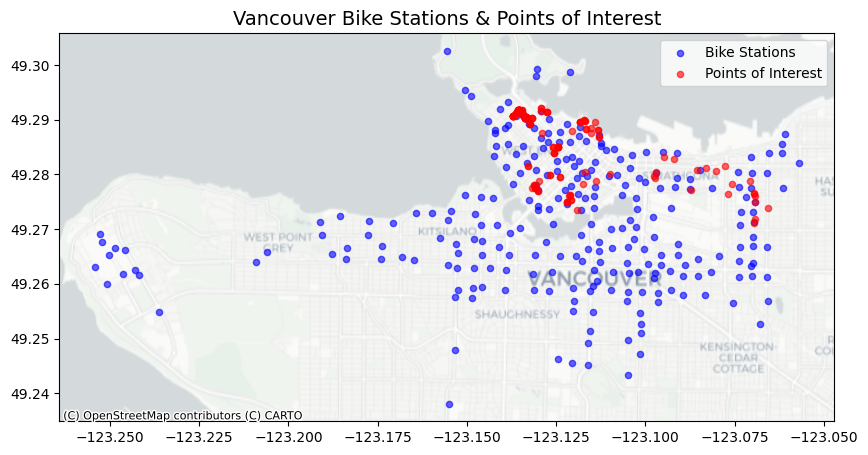

In [27]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from google.colab import files


bike_stations_df = pd.read_csv("vancouver_bikes.csv")
pois_df = pd.read_csv("bike_station_pois_yelp.csv")


pois_df.columns = pois_df.columns.str.strip()
bike_stations_df.columns = bike_stations_df.columns.str.strip()


bike_stations_df["latitude"] = pd.to_numeric(bike_stations_df["latitude"], errors="coerce")
bike_stations_df["longitude"] = pd.to_numeric(bike_stations_df["longitude"], errors="coerce")
pois_df["Latitude"] = pd.to_numeric(pois_df["Latitude"], errors="coerce")
pois_df["Longitude"] = pd.to_numeric(pois_df["Longitude"], errors="coerce")

bike_stations_df = bike_stations_df.dropna(subset=["latitude", "longitude"])
pois_df = pois_df.dropna(subset=["Latitude", "Longitude"])


bike_stations_gdf = gpd.GeoDataFrame(
    bike_stations_df, geometry=gpd.points_from_xy(bike_stations_df.longitude, bike_stations_df.latitude), crs="EPSG:4326"
)

pois_gdf = gpd.GeoDataFrame(
    pois_df, geometry=gpd.points_from_xy(pois_df.Longitude, pois_df.Latitude), crs="EPSG:4326"
)


fig, ax = plt.subplots(figsize=(10, 8))


bike_stations_gdf.plot(ax=ax, color="blue", markersize=20, alpha=0.6, label="Bike Stations")


pois_gdf.plot(ax=ax, color="red", markersize=20, alpha=0.6, label="Points of Interest")


ctx.add_basemap(ax, crs=bike_stations_gdf.crs, source=ctx.providers.CartoDB.Positron)


ax.set_title("Vancouver Bike Stations & Points of Interest", fontsize=14)
ax.legend()


plt.savefig("vancouver_bike_poi_map.png", dpi=300)
plt.show()


